In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine,inspect, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
# check the colums information of the measurement table
inspector= inspect(engine)
columns_measurement = inspector.get_columns('measurement')
for column in columns_measurement:
    print(column["name"], column["type"])




id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [11]:
# find out the last day of in the data
date_result = session.query(Measurement.date).all()
print(date_result)

[('2010-01-01',), ('2010-01-02',), ('2010-01-03',), ('2010-01-04',), ('2010-01-06',), ('2010-01-07',), ('2010-01-08',), ('2010-01-09',), ('2010-01-10',), ('2010-01-11',), ('2010-01-12',), ('2010-01-14',), ('2010-01-15',), ('2010-01-16',), ('2010-01-17',), ('2010-01-18',), ('2010-01-19',), ('2010-01-20',), ('2010-01-21',), ('2010-01-22',), ('2010-01-23',), ('2010-01-24',), ('2010-01-25',), ('2010-01-26',), ('2010-01-27',), ('2010-01-28',), ('2010-01-30',), ('2010-01-31',), ('2010-02-01',), ('2010-02-03',), ('2010-02-04',), ('2010-02-05',), ('2010-02-06',), ('2010-02-07',), ('2010-02-08',), ('2010-02-09',), ('2010-02-11',), ('2010-02-12',), ('2010-02-13',), ('2010-02-14',), ('2010-02-15',), ('2010-02-16',), ('2010-02-17',), ('2010-02-19',), ('2010-02-20',), ('2010-02-21',), ('2010-02-22',), ('2010-02-23',), ('2010-02-24',), ('2010-02-25',), ('2010-02-26',), ('2010-02-28',), ('2010-03-01',), ('2010-03-02',), ('2010-03-03',), ('2010-03-04',), ('2010-03-05',), ('2010-03-06',), ('2010-03-07'

In [12]:
# Calculate the date 1 year ago from the last data point in the database
last_year = dt.date(2017,8,23) - dt.timedelta(days=365)

last_year

datetime.date(2016, 8, 23)

In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
prcp_result = session.query(Measurement.prcp).filter(Measurement.date>=last_year).all()

prcp_result

[(0.0),
 (0.08),
 (0.08),
 (0.0),
 (0.0),
 (0.01),
 (0.0),
 (0.0),
 (0.13),
 (0.0),
 (0.0),
 (0.0),
 (0.03),
 (None),
 (None),
 (0.05),
 (0.0),
 (0.03),
 (0.0),
 (0.05),
 (0.0),
 (0.02),
 (1.32),
 (0.42),
 (0.06),
 (0.05),
 (0.0),
 (0.0),
 (0.0),
 (0.0),
 (0.02),
 (0.0),
 (0.0),
 (0.0),
 (0.06),
 (0.02),
 (0.0),
 (0.0),
 (0.0),
 (0.0),
 (0.0),
 (0.0),
 (0.0),
 (0.0),
 (0.0),
 (0.0),
 (0.0),
 (0.0),
 (0.0),
 (0.0),
 (0.0),
 (0.0),
 (0.0),
 (0.0),
 (0.0),
 (0.01),
 (0.0),
 (0.0),
 (0.0),
 (0.05),
 (0.15),
 (0.01),
 (0.0),
 (0.03),
 (0.0),
 (0.0),
 (0.0),
 (0.0),
 (0.24),
 (0.03),
 (0.0),
 (0.0),
 (0.0),
 (0.0),
 (0.0),
 (0.0),
 (0.0),
 (0.07),
 (0.0),
 (0.0),
 (0.0),
 (0.0),
 (0.0),
 (0.0),
 (0.0),
 (0.0),
 (0.0),
 (0.0),
 (0.03),
 (0.05),
 (0.01),
 (0.13),
 (0.14),
 (0.05),
 (0.05),
 (0.05),
 (0.0),
 (0.01),
 (0.0),
 (0.14),
 (0.12),
 (0.03),
 (0.0),
 (0.03),
 (0.43),
 (0.02),
 (0.0),
 (0.03),
 (0.52),
 (0.05),
 (0.04),
 (0.01),
 (0.05),
 (0.03),
 (0.0),
 (0.0),
 (0.01),
 (0.13),
 (0.01

In [14]:
# Perform a query to retrieve the data and precipitation scores
prcp_result = session.query(Measurement.date,Measurement.prcp).filter(Measurement.date>=last_year).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
df_result=pd.DataFrame(prcp_result, columns=(['Date','Precipitation']))
df_result.set_index(df_result['Date'],inplace=True)                
result= df_result.drop(columns=['Date'])  
result

,Precipitation
Date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
2016-08-28,0.01
2016-08-29,0.00
2016-08-30,0.00
2016-08-31,0.13


Text(0.5, 1.0, 'Precipitaion in previous 12 Months')

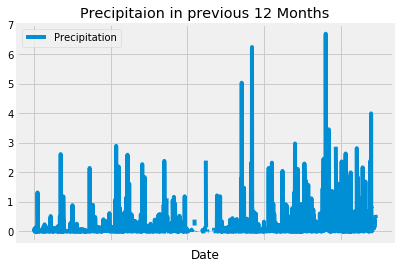

In [15]:
# Sort the dataframe by date
result.sort_values("Date")
# Use Pandas Plotting with Matplotlib to plot the data
result.plot()
plt.title("Precipitaion in previous 12 Months")

In [16]:
# Use Pandas to calcualte the summary statistics for the precipitation data
result.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [17]:
# Design a query to show how many stations are available in this dataset?
inspector = inspect(engine)
columns_station = inspector.get_columns('station')
for column in columns_station:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [18]:
# Design a query to show how many stations are available in this dataset?
station_result = session.query(func.count(Station.name)).all()
station_result

[(9)]

In [19]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
most_active_station=session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
most_active_station

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [20]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
sel = [func.min(Measurement.tobs), 
       func.max(Measurement.tobs), 
       func.avg(Measurement.tobs)]
temp_result=session.query(*sel).filter(Measurement.station == 'USC00519281').all()

temp_result

[(54.0, 85.0, 71.66378066378067)]

In [21]:
# Choose the station with the highest number of temperature observations.

session.query(Measurement.station,Measurement.tobs,Measurement.date).order_by(Measurement.tobs.desc()).all()

[('USC00519397', 87.0, '2010-08-23'),
 ('USC00519397', 87.0, '2017-05-23'),
 ('USC00517948', 87.0, '2017-07-03'),
 ('USC00511918', 87.0, '2010-09-19'),
 ('USC00511918', 86.0, '2011-10-08'),
 ('USC00511918', 86.0, '2012-07-26'),
 ('USC00511918', 86.0, '2013-09-16'),
 ('USC00511918', 86.0, '2015-08-28'),
 ('USC00519397', 85.0, '2011-09-12'),
 ('USC00519397', 85.0, '2014-09-26'),
 ('USC00513117', 85.0, '2014-09-14'),
 ('USC00513117', 85.0, '2015-08-28'),
 ('USC00514830', 85.0, '2015-08-29'),
 ('USC00519523', 85.0, '2017-08-19'),
 ('USC00519281', 85.0, '2015-09-10'),
 ('USC00511918', 85.0, '2010-06-20'),
 ('USC00511918', 85.0, '2013-08-31'),
 ('USC00511918', 85.0, '2014-09-24'),
 ('USC00511918', 85.0, '2015-08-03'),
 ('USC00519397', 84.0, '2013-05-03'),
 ('USC00519397', 84.0, '2014-06-24'),
 ('USC00519397', 84.0, '2014-09-22'),
 ('USC00519397', 84.0, '2014-09-24'),
 ('USC00519397', 84.0, '2015-08-22'),
 ('USC00513117', 84.0, '2010-10-23'),
 ('USC00513117', 84.0, '2013-08-26'),
 ('USC005131

In [24]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
#prev_year = dt.date.today() - dt.timedelta(days=365)
temp_result=session.query(Measurement.tobs).\
    filter(Measurement.station=="USC00519397").\
    filter(Measurement.date>=last_year).all()

temp_result

[(81.0),
 (79.0),
 (80.0),
 (79.0),
 (77.0),
 (78.0),
 (78.0),
 (79.0),
 (80.0),
 (81.0),
 (80.0),
 (79.0),
 (75.0),
 (79.0),
 (76.0),
 (76.0),
 (80.0),
 (79.0),
 (78.0),
 (76.0),
 (78.0),
 (78.0),
 (75.0),
 (79.0),
 (80.0),
 (79.0),
 (81.0),
 (77.0),
 (77.0),
 (78.0),
 (76.0),
 (82.0),
 (81.0),
 (78.0),
 (80.0),
 (80.0),
 (79.0),
 (80.0),
 (80.0),
 (80.0),
 (79.0),
 (79.0),
 (79.0),
 (80.0),
 (80.0),
 (79.0),
 (78.0),
 (76.0),
 (75.0),
 (80.0),
 (80.0),
 (79.0),
 (80.0),
 (79.0),
 (78.0),
 (78.0),
 (80.0),
 (81.0),
 (79.0),
 (77.0),
 (79.0),
 (78.0),
 (77.0),
 (77.0),
 (78.0),
 (77.0),
 (78.0),
 (77.0),
 (76.0),
 (77.0),
 (77.0),
 (77.0),
 (77.0),
 (77.0),
 (76.0),
 (75.0),
 (71.0),
 (71.0),
 (71.0),
 (71.0),
 (72.0),
 (71.0),
 (72.0),
 (77.0),
 (77.0),
 (77.0),
 (77.0),
 (77.0),
 (75.0),
 (76.0),
 (76.0),
 (75.0),
 (72.0),
 (74.0),
 (75.0),
 (73.0),
 (76.0),
 (75.0),
 (68.0),
 (75.0),
 (75.0),
 (72.0),
 (69.0),
 (71.0),
 (68.0),
 (67.0),
 (69.0),
 (73.0),
 (70.0),
 (70.0),
 (70.0),
 

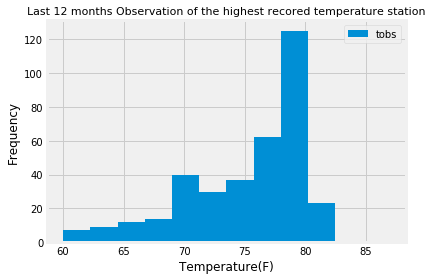

In [25]:
temp_df = pd.DataFrame(temp_result, columns=['tobs'])
temp_df.plot.hist(bins=12)
plt.title("Last 12 months Observation of the highest recored temperature station",size=11)
plt.xlabel("Temperature(F)")
plt.tight_layout()
plt.show()

In [26]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [27]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
trip_start_day = dt.date(2018, 4, 23) - dt.timedelta(days=365)
trip_end_day= dt.date(2018, 4, 30) - dt.timedelta(days=365)
minT, avgT, maxT = calc_temps(trip_start_day.strftime("%Y-%m-%d"), trip_end_day.strftime("%Y-%m-%d"))[0]
print(f"Mininum Temperature is {minT}, Average Temperature is {avgT}, Maximum Temperature is {maxT}(F).")

Mininum Temperature is 58.0, Average Temperature is 73.1, Maximum Temperature is 81.0(F).


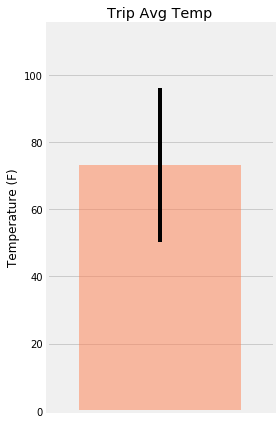

In [28]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
fig, ax = plt.subplots(figsize=plt.figaspect(1.5))
yerr=maxT-minT
x_axis=1
xticks=range(x_axis)

ax.bar(x_axis, avgT, yerr=yerr, alpha=0.5, color='coral', align="center")
ax.margins(.2, .2)
plt.xticks(xticks)
plt.title("Trip Avg Temp")
plt.ylabel("Temperature (F)")
plt.tight_layout()
plt.show()

In [29]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
start=trip_start_day.strftime("%Y-%m-%d")
end=trip_end_day.strftime("%Y-%m-%d")
sel=[Station.station, Station.name, Station.latitude, 
       Station.longitude, Station.elevation, func.sum(Measurement.prcp)]
results = session.query(*sel).\
    filter(Measurement.station==Station.station).\
    filter(Measurement.date >= start).\
    filter(Measurement.date <= end).\
    group_by(Station.name).order_by(func.sum(Measurement.prcp).desc()).all()
print(results)


[('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5, 7.57), ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 4.28), ('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 2.45), ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, 2.37), ('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 2.3200000000000003), ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 1.04), ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, None)]


## Optional Challenge Assignment

In [28]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [29]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`
normals=[]
# Set the start and end date of the trip
trip_start_day = '2018-04-23'
trip_end_day= '2018-04-30'
# Use the start and end date to create a range of dates
trip_range=pd.date_range(trip_start_day, trip_end_day, freq='D')
# Stip off the year and save a list of %m-%d strings
trip_month_day = trip_range.strftime('%m-%d')
# Loop through the list of %m-%d strings and calculate the normals for each date
for date in trip_month_day:
    #daily=daily_normals(date)
    normals.append(daily_normals(date)[0])

normals

[(65.0, 73.01818181818182, 79.0),
 (67.0, 73.3103448275862, 80.0),
 (66.0, 73.96551724137932, 83.0),
 (66.0, 74.01724137931035, 81.0),
 (65.0, 72.87272727272727, 81.0),
 (63.0, 73.46428571428571, 79.0),
 (66.0, 73.30357142857143, 81.0),
 (58.0, 71.5576923076923, 78.0)]

In [30]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
df=pd.DataFrame(normals,columns=['MinT','AvgT','MaxT'],index=trip_range)
df

,MinT,AvgT,MaxT
2018-04-23,65.0,73.018182,79.0
2018-04-24,67.0,73.310345,80.0
2018-04-25,66.0,73.965517,83.0
2018-04-26,66.0,74.017241,81.0
2018-04-27,65.0,72.872727,81.0
2018-04-28,63.0,73.464286,79.0
2018-04-29,66.0,73.303571,81.0
2018-04-30,58.0,71.557692,78.0


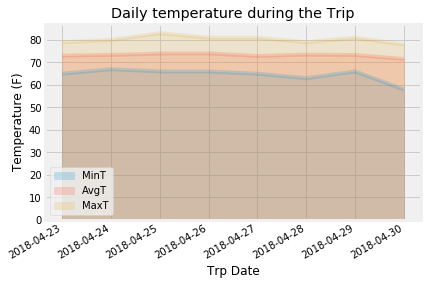

In [31]:
# Plot the daily normals as an area plot with `stacked=False`

df.plot(kind='area',stacked=False,title="Daily temperature during the Trip",x_compat=True,alpha=0.2)
plt.axis(rotation="45")

plt.xlabel("Trp Date")
plt.ylabel("Temperature (F)")
plt.show()
